# Actinometry Conversion Template
- The solar irradiance spectra is simulated from the Tropospheric Ultraviolet and Visible (TUV) Radiation Model from NCAR. The location selected is Vancouver (lat=49.2827N, lon=123.12W), on June 21st 2023 (solstice) at noon, measured at an altitude of 5km. Global irradiance is calculated as the sum of direct and diffuse irradiance 
- This is the calculation made from our 1O2 sensitizer paper, change parameters/data accordingly for future experiments 

- Any questions/comments/suggestions can be sent to Keighan Gemmell (keighan@chem.ubc.ca) 
- Last updated on Oct. 17th, 2023

# Import Packages

In [25]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import math

# Fill out Experimental data section

In [ ]:
#Change times to match your times of sampling
times=np.array([0, 2, 4, 8, 16, 32, 60, 90, 120, 180, 240])*60 #put in times and convert to seconds
PNA=[] #put hplc data here 

In [ ]:
#Calculate kobs here
PNAlog=np.log([i/PNA[0] for i in PNA])
kpna=-(np.polyfit(times,PNAlog,1)[0])

# Define the experiment dependent parameters here

In [26]:
#You will need to fill out these 2 variables
kpna=kpna # kobs from the experiment, s^-1 
pna0= #M, mmol/cm^3 starting concentration of PNA 
#----------------------------------------------------
L=1.3 #cm, pathlength of borosilicate tubes 
quantumPNA=pna0*0.29+0.00029 #from original PNA/pyr actinometry paper 

# Load in Irradiance and extinction coefficient data

In [27]:
dfIrr=pd.read_csv('Actinometry.csv')
IrrExp=dfIrr['Iλm (J*m-2*s-1*nm-1) reactor']
IrrTUV=dfIrr['TUV Irr (J*m-2*s-1*nm-1) ']
EPNA=dfIrr['εPNA (M-1*cm-1)'] #M cm^-1, from original PNA/pyr actinometry paper 

IrrExp=IrrExp[0:101]
IrrTUV=IrrTUV[0:101]
EPNA=EPNA[0:101]

IrrExp=IrrExp.astype(float) 
IrrTUV=IrrTUV.astype(float) 
EPNA=EPNA.astype(float)

In [28]:
wavelength=np.linspace(400,300,101) #make wavelength array

In [29]:
#Convert data to mmol photon units
c=3*10**8 #m/s
h=6.626*10**-34 #J s
Na=6.023*10**23 #mol^-1

IrrTUV_mmol=(IrrTUV*wavelength*10**-10)/(h*c*Na) #Convert sunlight irradiance to mmol units
IrrExp=(IrrExp*wavelength*10**-10)/(h*c*Na) #Convert photoreactor irradiance to mmol units

In [ ]:
#REVERSE sunlight spectra because it gets flipped
IrrTUV=list(reversed(IrrTUV))

# Calculate relative irradiance 

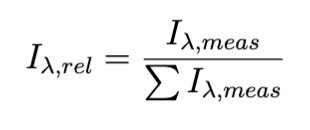

In [30]:
#Calculate relative irradiance 
I_rel=IrrExp/(np.sum(IrrExp))

# Calculate scaling factor

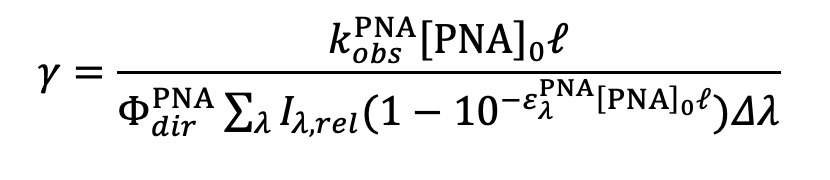

In [31]:
numerator=kpna*pna0*L
denom = quantumPNA*(np.sum(I_rel*(1-(10**-(EPNA*L*pna0)))))

#scaling factor will have units of mmol photons cm^-2 s^-1 nm^-1 because we are using relative irradiance 
scaling_factor=numerator/denom
scaling_factor

5.2655664120049925e-05

# Calculate absolute irradiance

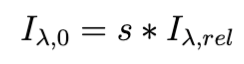

In [32]:
I_abs=I_rel*scaling_factor #Multiply by scaling factor to get the absolute irradiance 
#I_abs then has units of mmol photons cm^-2 s^-1 nm^-1 

# Read in the UV-Vis absorbance data (CSV File) as a pandas dataframe

In [33]:
#First you will need to upload your csv file to this server
#then read in csv file as pandas dataframe, skipping the 2nd row
df = pd.read_csv('ARTHOZOUL_sensitizers_wavelength_irradiance for Rabs.csv') #change the name of the csv file to the name of the file you imported


In [34]:
wavelength=np.linspace(800,200,601) #make wavelength array

#Note: It's weird, but when reading in the csv file to python, it sometimes auto-names the samples to "unnamed: #" 
#extract absorbances (remember that because of the layout of the csv file the absorbances will sometimes be 
#named "Unnamed: x (odd number). Just check that you are indexing the correct names when assigning variables
sample1_abs = df['Unnamed: x'] 
sample2_abs = df['Unnamed: x']
sample3_abs = df['Unnamed: x']
blank_abs = df['Unnamed: x']
PN_abs = df['Unnamed: x']

#change all absorbances to type 'float' for ease of calculation
sample1_abs=sample1_abs.astype(float)
sample2_abs=sample2_abs.astype(float)
sample3_abs=sample3_abs.astype(float)
blank_abs=blank_abs.astype(float)
PN_abs=PN_abs.astype(float)


In [35]:
#subset the absorbances for each chromophore to only include 300-400nm for conversion factor
sample1_abs=sample1_abs[401:502]
sample2_abs=sample2_abs[401:502]
sample3_abs=sample3_abs[401:502]


# Equations for Samples

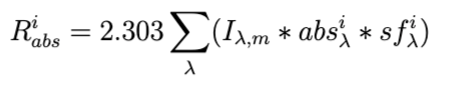

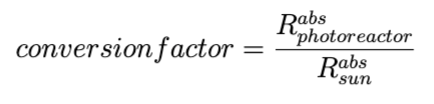

In [36]:

#Rabs for the photoreactor
pathlength=1 #put in pathlength of cuvette

alpha=   #put in the absorbance array from UV-Vis 

sf_reactor=(1-10**(-alpha*pathlength))/(2.303*alpha*pathlength) #screening factor: alpha is the absorbance 

R_abs_reactor = 2.303*np.sum(I_abs.reset_index(drop=True)  * alpha.reset_index(drop=True) * sf_reactor.reset_index(drop=True))


#Rabs for the sunlight
pathlength=1 #put in pathlength of cuvette

alpha=   #put in the absorbance array from UV-Vis 

sf_sun=(1-10**(-alpha*pathlength))/(2.303*alpha*pathlength) #screening factor: alpha is the absorbance 

R_abs_sun = 2.303*np.sum(IrrTUV_mmol.reset_index(drop=True)  * alpha.reset_index(drop=True) * sf_sun.reset_index(drop=True))

conversion=R_abs_reactor/R_abs_sun

print('Rabs Photoereactor:',R_abs_reactor)
print('Rabs Sun:', R_abs_sun)
print('Conversion Factor:',conversion)


Rabs Photoereactor: 2.3168705285087296e-05
Rabs Sun: 1.0305415799461535e-05
Conversion Factor: 2.2482067425457863
